<a href="https://colab.research.google.com/github/diabel778710091/DiabenPr-diction-d-Inclusion-Financi-re/blob/main/Classification_de_l'apprentissage_supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importation des données et exploration de base

In [ ]:
pip install scikit-learn yellowbrick

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# c'est un algo d'apprentissage non supervise
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Charger les données
file_path = '/content/African_crises_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Afficher des informations générales sur l'ensemble de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
# Créer un rapport de profilage de pandas
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_notebook_iframe()

In [ ]:
# Gérer les valeurs manquantes et corrompues
data = data.dropna()

In [ ]:
data.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [ ]:
# Supprimer les doublons, s'ils existent
data = data.drop_duplicates()

In [ ]:
data.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


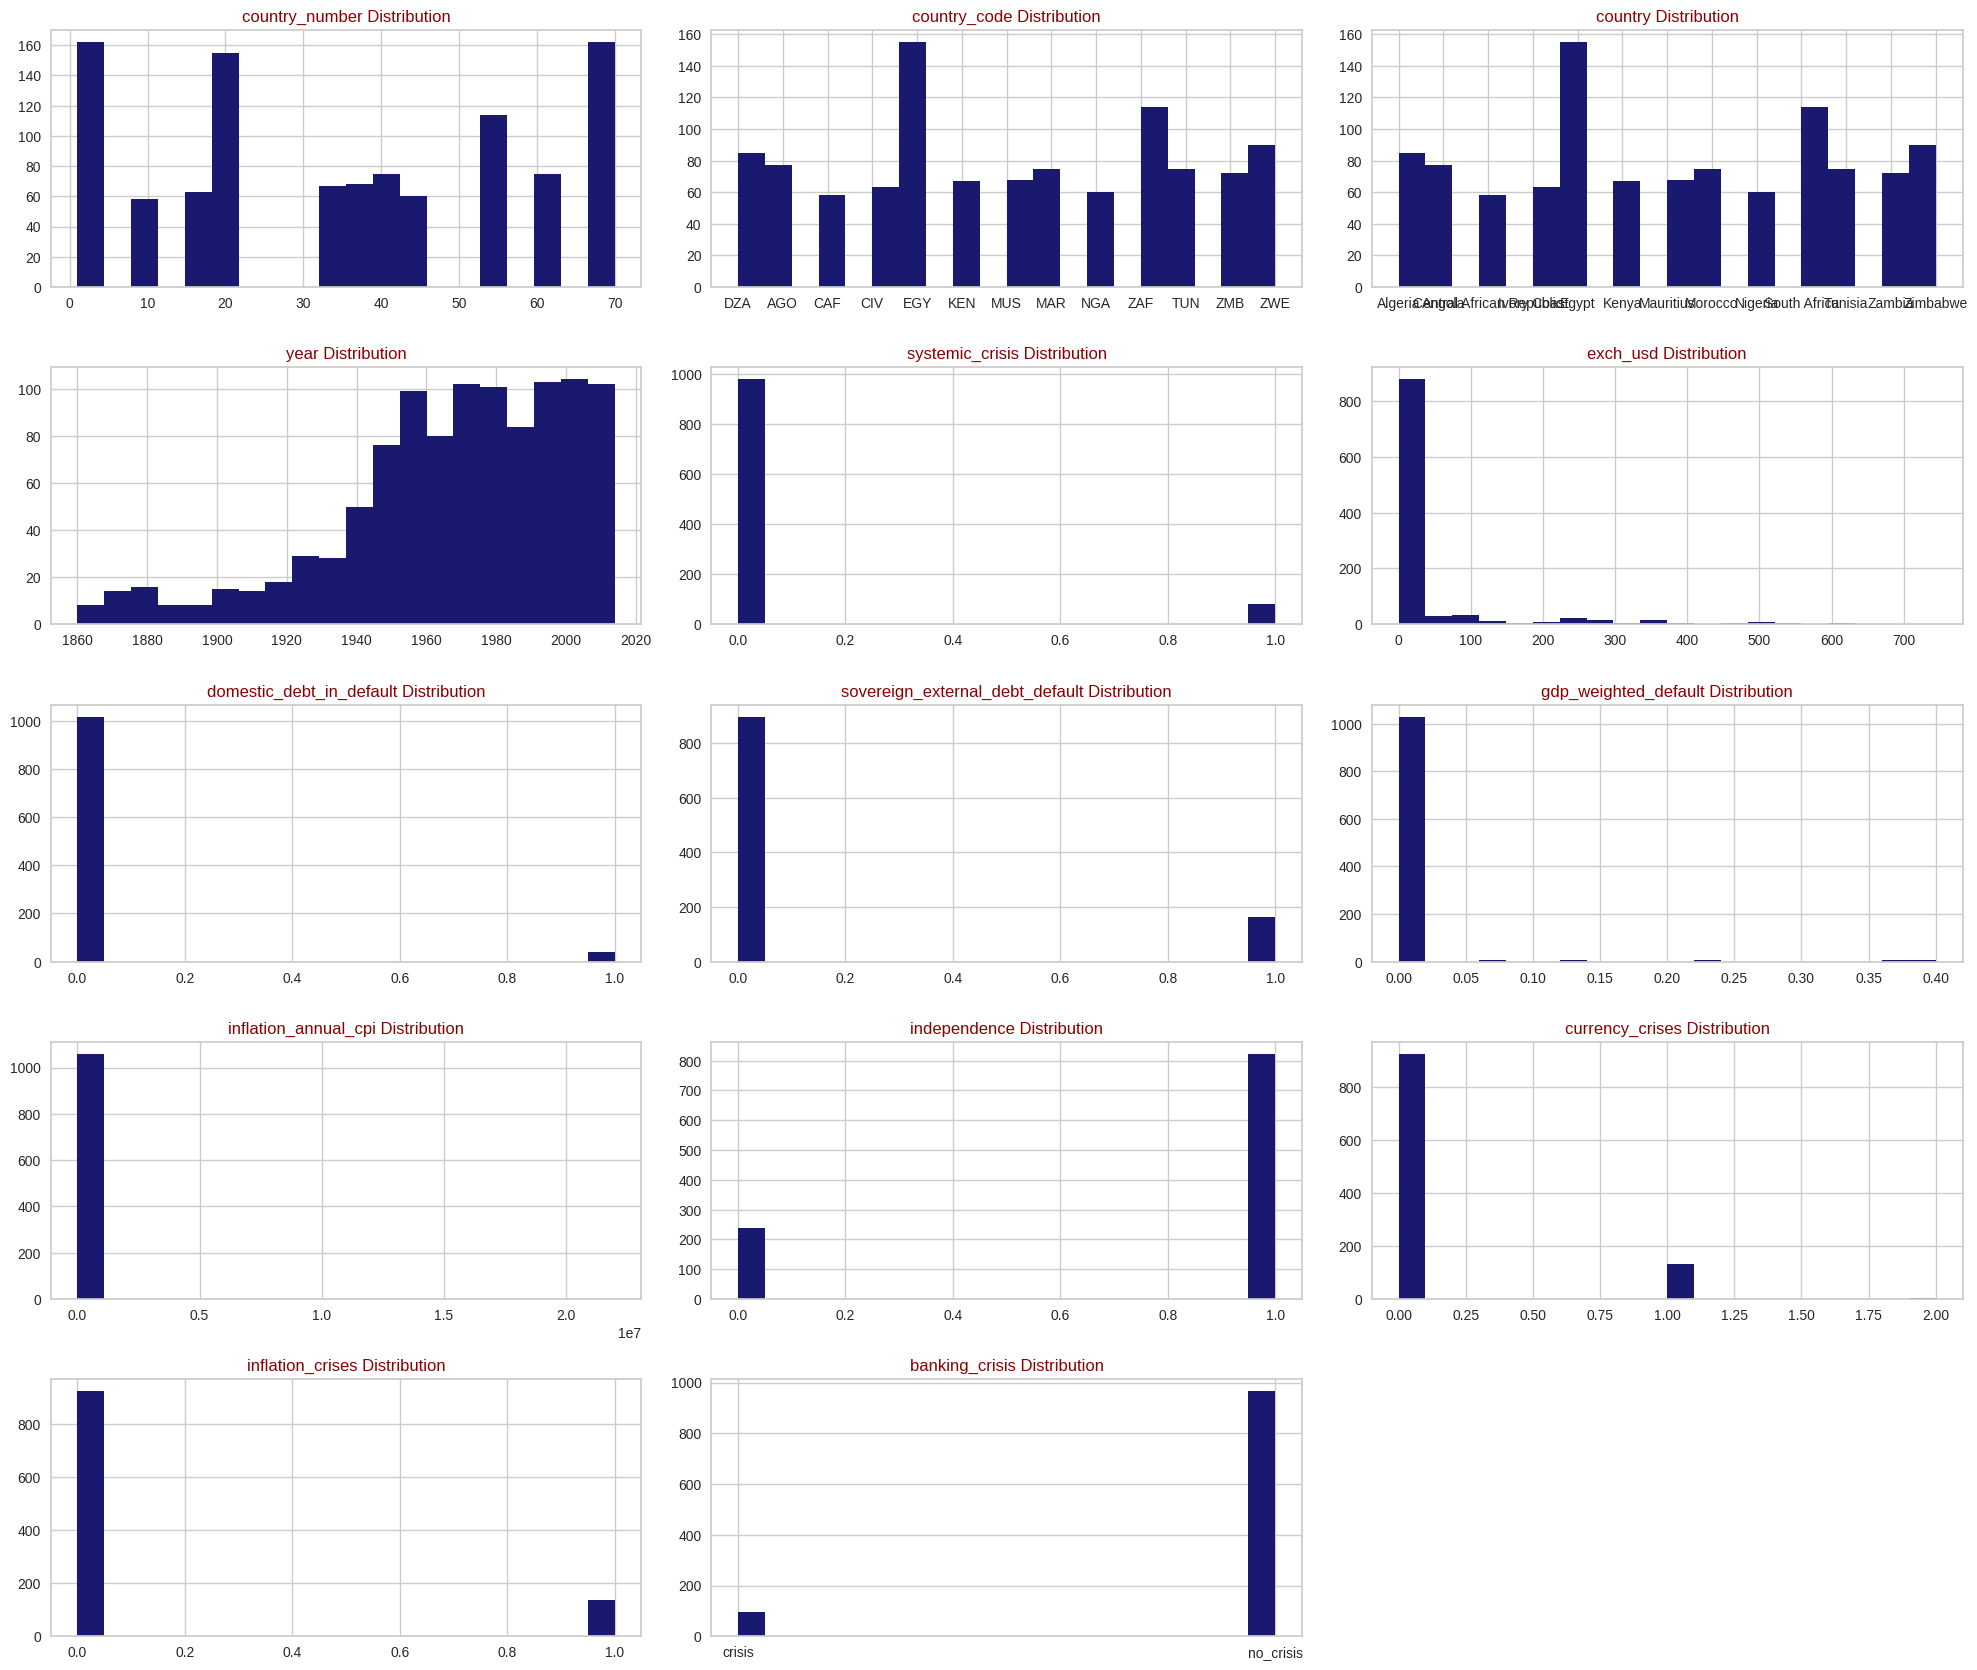

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(data,data.columns,6,3)

In [ ]:
# One-hot encode the 'country' and 'country_code' columns
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_countries = one_hot_encoder.fit_transform(data[['country_code', 'country']]).toarray()
encoded_columns = one_hot_encoder.get_feature_names_out(['country_code', 'country'])

In [ ]:
# Supprimer les colonnes originales après encodage et ajouter les colonnes encodées
data_encoded = pd.concat([data.drop(['country_code', 'country'], axis=1),
                          pd.DataFrame(encoded_countries, columns=encoded_columns)], axis=1)

In [ ]:
# Encoder la colonne 'banking_crisis' avec Label Encoding
data_encoded["banking_crisis"] = data_encoded["banking_crisis"].map({"crisis": 1, "no_crisis": 0})

Sélection de la variable cible et des fonctionnalités

In [ ]:
# Sélection de la variable cible et des fonctionnalités
target = 'banking_crisis'
features = data_encoded.drop(columns=[target])

X = features
y = data_encoded[target]

Division de l'ensemble de données en ensembles d'entraînement et de test

In [ ]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sélection et entraînement de l'algorithme de classification

In [ ]:
# Entraîner le modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Tester les performances du modèle
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       0.94      0.94      0.94        18

    accuracy                           0.99       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.99      0.99      0.99       212



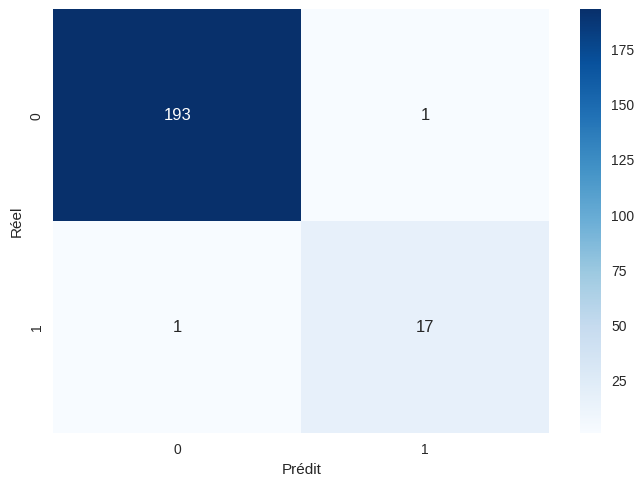

In [ ]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Détermination du nombre optimal de clusters avec la méthode du coude pour le clustering k-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

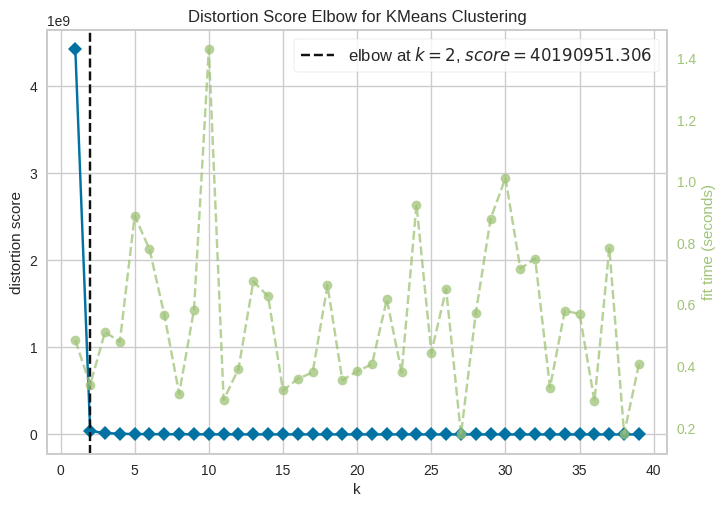

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Déterminer le K optimal pour k-Means clustering (not k-NN)
visualizer = KElbowVisualizer(KMeans(), k=(1,40)) # Use KMeans here
visualizer.fit(X_train)
visualizer.show()

Le graphique suggère que le nombre optimal de clusters pour ce jeu de données est ( k = 2 ), car c'est là que se trouve le "coude" dans le score de distorsion. Cela signifie que 2 clusters offrent un bon équilibre entre une faible distorsion et une complexité computationnelle raisonnable. Au-delà de( k = 2 ), l'amélioration en termes de distorsion est marginale par rapport à l'augmentation du nombre de clusters.

In [ ]:
# Récupérer le K optimal
k_optimal = visualizer.elbow_value_
print(f"K optimal: {k_optimal}")

K optimal: 2



Évaluation des performances du modèle k-NN

In [ ]:
# Construire et entraîner le modèle k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Tester les performances du modèle k-NN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.93


In [ ]:
# Afficher le rapport de classification pour k-NN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       194
           1       0.64      0.39      0.48        18

    accuracy                           0.93       212
   macro avg       0.79      0.68      0.72       212
weighted avg       0.92      0.93      0.92       212



le modèle semble performant pour la classe 0 (avec une haute précision et un rappel élevé), mais moins pour la classe 1, où la précision et le rappel sont plus bas. L'accuracy (précision globale) est de 0.93, ce qui indique que le modèle prédit correctement la classe de 93 % des échantillons.

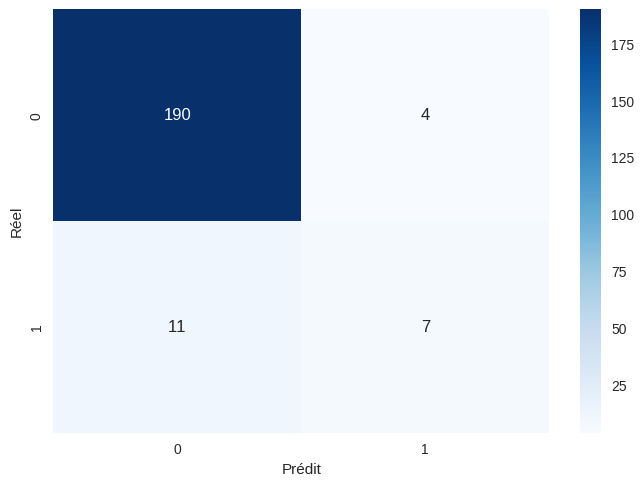

In [ ]:
# Créer la matrice de confusion pour k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Arbre de décision

In [ ]:
# Construire et entraîner le modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Tester les performances du modèle Decision Tree
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.97


In [ ]:
# Afficher le rapport de classification pour Decision Tree
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       194
           1       0.77      0.94      0.85        18

    accuracy                           0.97       212
   macro avg       0.88      0.96      0.92       212
weighted avg       0.98      0.97      0.97       212



le modèle semble avoir une performance élevée, avec des scores très élevés pour la classe majoritaire (0), mais légèrement plus faibles pour la classe minoritaire (1), bien que toujours très bons. Cela suggère que le modèle est efficace dans la prédiction de la classe 0, mais pourrait nécessiter une amélioration légère pour la classe 1, en fonction du contexte spécifique de votre application.

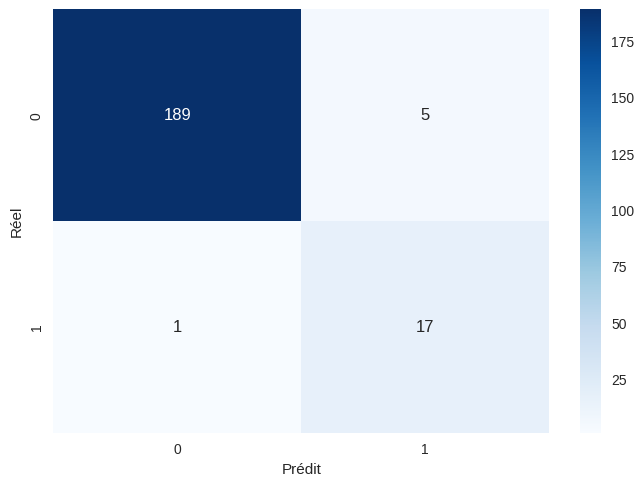

In [ ]:
# Créer la matrice de confusion pour Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Forêt aléatoire

In [ ]:
# Construire et entraîner le modèle Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Tester les performances du modèle Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 1.00


In [ ]:
# Afficher le rapport de classification pour Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       194
           1       0.95      1.00      0.97        18

    accuracy                           1.00       212
   macro avg       0.97      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



e modèle semble avoir des performances très élevées, avec une précision globale de 1.00 et un F1-score moyen de 1.00, ce qui suggère qu'il prédit très bien les deux classes (0 et 1) dans votre ensemble de données.

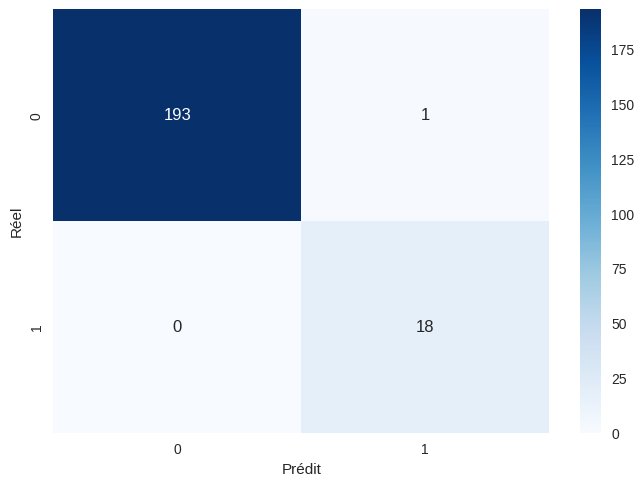

In [ ]:
# Créer la matrice de confusion pour Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Validation meilleure algorithme ML

In [ ]:
# Validation croisée pour évaluer la robustesse du modèle
models = {
    "Logistic Regression": logreg,
    "k-NN": knn,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Logistic Regression Cross-Validation Accuracy: 0.97 (+/- 0.02)
k-NN Cross-Validation Accuracy: 0.86 (+/- 0.04)
Decision Tree Cross-Validation Accuracy: 0.84 (+/- 0.23)
Random Forest Cross-Validation Accuracy: 0.92 (+/- 0.07)


In [ ]:
# Ajustement des hyperparamètres avec GridSearchCV pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# Tester les performances du meilleur modèle Random Forest
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf:.2f}")

Best Random Forest Accuracy: 0.99


In [ ]:
# Afficher le rapport de classification pour le meilleur modèle Random Forest
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       194
           1       0.90      1.00      0.95        18

    accuracy                           0.99       212
   macro avg       0.95      0.99      0.97       212
weighted avg       0.99      0.99      0.99       212



ces résultats montrent que le modèle a une très bonne performance globale avec des scores élevés en précision, rappel et F1-score pour les deux classes.

Ces résultats témoignent d'une performance exceptionnelle de notre modèle de classification. Il a obtenu des valeurs élevées de précision, recall et f1-score pour les deux classes étudiées. L'accuracy globale de 99% confirme la capacité du modèle à prédire avec précision la classe des instances dans l'ensemble de données d'évaluation.

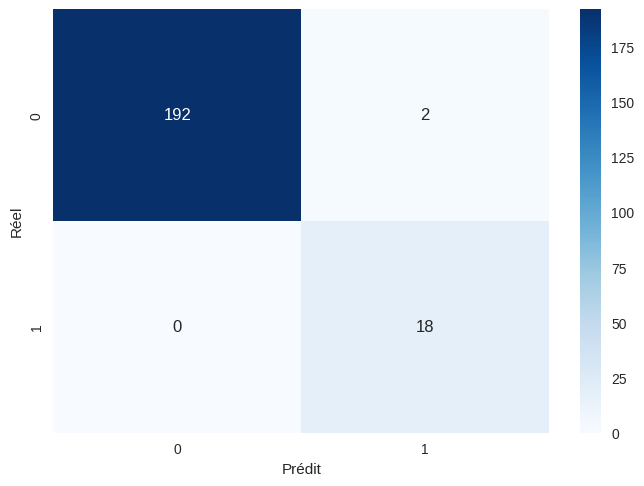

In [ ]:
# Créer la matrice de confusion pour le meilleur modèle Random Forest
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [ ]:
# Définir les valeurs des prédictions et des vérités terrain
# Les valeurs sont tirées de l'image fournie
TP = 18  # True Positives
TN = 192 # True Negatives
FP = 2   # False Positives
FN = 0   # False Negatives

# Calculer l'Exactitude (Accuracy)
accuracy = (TN + TP) / (TN + TP + FP + FN)
print(f"Exactitude (Accuracy) : {accuracy:.4f} ou {accuracy*100:.2f}%")

# Calculer la Précision pour la classe 1 (Positive Predictive Value)
precision = TP / (TP + FP)
print(f"Précision pour la classe 1 (Positive Predictive Value) : {precision:.2f} ou {precision*100:.0f}%")

# Calculer le Rappel pour la classe 1 (Sensitivity ou True Positive Rate)
recall = TP / (TP + FN)
print(f"Rappel pour la classe 1 (Sensitivity ou True Positive Rate) : {recall:.2f} ou {recall*100:.0f}%")

# Calculer la Spécificité pour la classe 0 (True Negative Rate)
specificity = TN / (TN + FP)
print(f"Spécificité pour la classe 0 (True Negative Rate) : {specificity:.4f} ou {specificity*100:.2f}%")

Exactitude (Accuracy) : 0.9906 ou 99.06%
Précision pour la classe 1 (Positive Predictive Value) : 0.90 ou 90%
Rappel pour la classe 1 (Sensitivity ou True Positive Rate) : 1.00 ou 100%
Spécificité pour la classe 0 (True Negative Rate) : 0.9897 ou 98.97%


Cette matrice de confusion montre que le modèle a une très bonne performance globale, avec une accuracy élevée et un rappel parfait pour la classe 1. Il y a très peu de faux positifs (2) et aucun faux négatif.